In [24]:
import numpy as np

In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
%matplotlib inline

In [28]:
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                     names = ['Number of times pregnant', 'Plasma Glucose',"Diastolic Blood pressure", 'triceps Skinfold thickness',
                             "serum insulin", 'Body mass Index',"Diabetes Pegdegre function", 'Age',"class"])

In [29]:
dataset.head()

,Number of times pregnant,Plasma Glucose,Diastolic Blood pressure,triceps Skinfold thickness,serum insulin,Body mass Index,Diabetes Pegdegre function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant      768 non-null int64
Plasma Glucose                768 non-null int64
Diastolic Blood pressure      768 non-null int64
triceps Skinfold thickness    768 non-null int64
serum insulin                 768 non-null int64
Body mass Index               768 non-null float64
Diabetes Pegdegre function    768 non-null float64
Age                           768 non-null int64
class                         768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
dataset.describe()

,Number of times pregnant,Plasma Glucose,Diastolic Blood pressure,triceps Skinfold thickness,serum insulin,Body mass Index,Diabetes Pegdegre function,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Sandeep Tukkunor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sandeep Tukkunor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


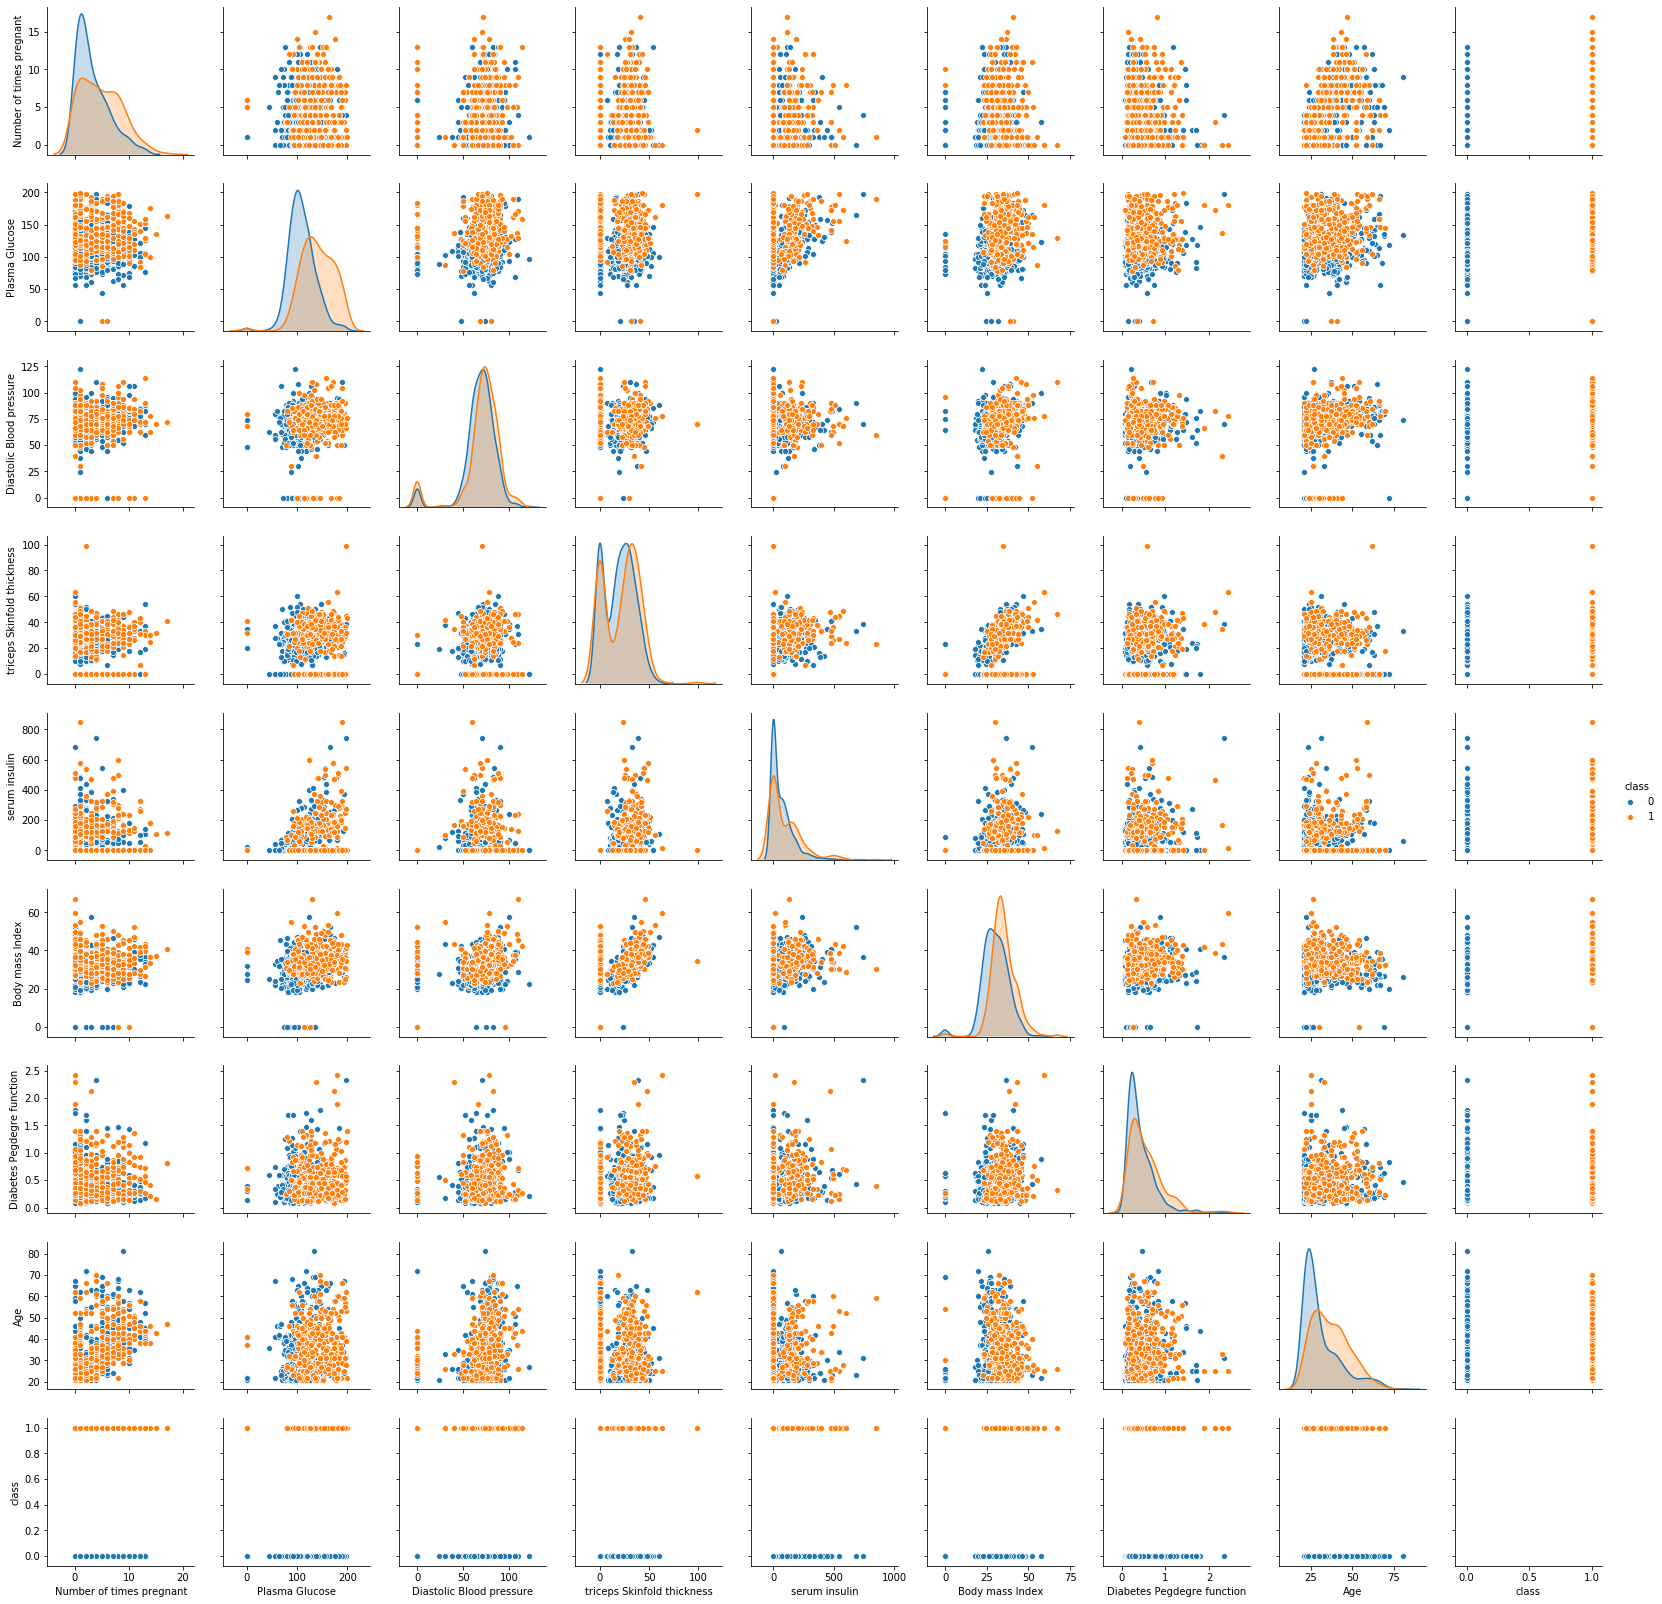

In [32]:
sns.pairplot(dataset, hue = 'class')

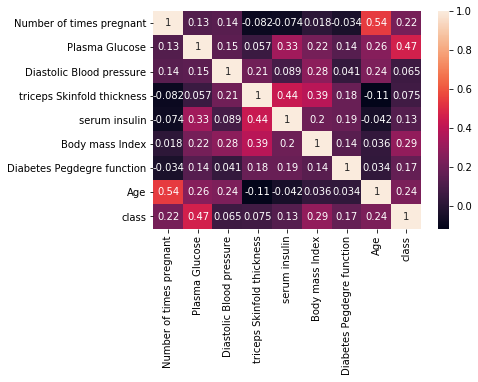

In [33]:
sns.heatmap(dataset.corr(), annot=True)
#We plot the heatmap by using the correlation for the dataset. This helps us eliminate any features that may not help with prediction.

Now that we understand the data let’s create the input features and the target variables and get the data ready for inputting it to our neural network by preprocessing the data.


In [34]:
# creating input features and target values 
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

In [35]:
X.head()

,Number of times pregnant,Plasma Glucose,Diastolic Blood pressure,triceps Skinfold thickness,serum insulin,Body mass Index,Diabetes Pegdegre function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# we need to standardize the the input 

In [39]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Now we have to Slpit the data into test set and train set so that we can test and train the data 
For this there is a library in sklearn called as train_test_split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

<li> So far we have processed the data and we are now ready to build a neural Network</li>
<li>In this session we are choosing keras library to build a neural network</li>
<li>There are two types available in keras , one is sequential and the other is Moder</li>
<li>We will be using sequential for building the neural network</li> 

In [42]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


We have 8 input features and one target variable. 2 Hidden layers. Each hidden layer will have 4 nodes.

ReLu will be the activation function for hidden layers. As this is a binary classification problem we will use sigmoid as the activation function

Dense layer implements

output = activation(dot(input, kernel) + bias)

kernel is the weight matrix. kernel initialization defines the way to set the initial random weights of Keras layers.

Random normal initializer generates tensors with a normal distribution.


For uniform distribution, we can use Random uniform initializers.

Keras provides multiple initializers for both kernel or weights as well as for bias units.


In [45]:
classifier = Sequential()
#for first hidden layer 

classifier.add(Dense(4, activation = 'relu',kernel_initializer = 'random_normal',input_dim = 8 ))


#For srcond hidden layer
classifier.add(Dense(4, activation= 'relu', kernel_initializer= 'random_normal'))

#for output layer
classifier.add(Dense(1, activation  = 'sigmoid', kernel_initializer = 'random_normal'))

Once the different layers are created we now compile the neural network.


As this is a binary classification problem, we use binary_crossentropy to calculate the loss function between the actual output and the predicted output.


To optimize our neural network we use Adam. Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.


Momentum takes the past gradients into account in order to smooth out the gradient descent.


we use accuracy as the metrics to measure the performance of the model

In [47]:
#compiling the neural network 
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'])


we now fit out training data to the model we created. we use a batch_size of 10. This implies that we use 10 samples per gradient update.

We iterate over 100 epochs to train the model. An epoch is an iteration over the entire data set.

In [48]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 0s 270us/step - loss: 0.6895 - accuracy: 0.6592
Epoch 2/100
537/537 [==============================] - 0s 91us/step - loss: 0.6797 - accuracy: 0.6592
Epoch 3/100
537/537 [==============================] - 0s 106us/step - loss: 0.6613 - accuracy: 0.6592
Epoch 4/100
537/537 [==============================] - 0s 95us/step - loss: 0.6294 - accuracy: 0.6592
Epoch 5/100
537/537 [==============================] - 0s 95us/step - loss: 0.5874 - accuracy: 0.6574
Epoch 6/100
537/537 [==============================] - 0s 96us/step - loss: 0.5472 - accuracy: 0.7132
Epoch 7/100
537/537 [==============================] - 0s 123us/step - loss: 0.5155 - accuracy: 0.7840
Epoch 8/100
537/537 [==============================] - 0s 100us/step - loss: 0.4933 - accuracy: 0.7784
Epoch 9/100
537/537 [==============================] - 0s 90us/step - loss: 0.4770 - accuracy: 0.7765
Epoch 10/100
537/537 [==============================] - 0s 86us/step - loss: 0

537/537 [==============================] - 0s 100us/step - loss: 0.4231 - accuracy: 0.8026
Epoch 81/100
537/537 [==============================] - 0s 103us/step - loss: 0.4224 - accuracy: 0.8082
Epoch 82/100
537/537 [==============================] - 0s 95us/step - loss: 0.4226 - accuracy: 0.8063
Epoch 83/100
537/537 [==============================] - 0s 90us/step - loss: 0.4225 - accuracy: 0.8007
Epoch 84/100
537/537 [==============================] - 0s 94us/step - loss: 0.4229 - accuracy: 0.8063
Epoch 85/100
537/537 [==============================] - 0s 122us/step - loss: 0.4219 - accuracy: 0.8045
Epoch 86/100
537/537 [==============================] - 0s 123us/step - loss: 0.4221 - accuracy: 0.8082
Epoch 87/100
537/537 [==============================] - 0s 107us/step - loss: 0.4216 - accuracy: 0.8026
Epoch 88/100
537/537 [==============================] - 0s 118us/step - loss: 0.4221 - accuracy: 0.8045
Epoch 89/100
537/537 [==============================] - 0s 111us/step - loss: 0.

After 100 epochs we get an accuracy of around 80%

We can also evaluate the loss value & metrics values for the model in test mode using evaluate function

In [49]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

537/537 [==============================] - 0s 43us/step


[0.41927610984283675, 0.8100558519363403]

We now predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [50]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

Now is the moment of truth. we check the accuracy on the test dataset


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[123  23]
 [ 34  51]]
